In [1]:
import pandas as pd
import yfinance as yf #vamos a usar yfinance para extaer informacion sobre stocks
import matplotlib as mat
import requests as rq
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math as  mt
import numpy as np

Question 1: Use yfinance to Extract Stock Data

In [2]:
#Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. 
# The stock is Tesla and its ticker symbol is `TSLA`.

tesla = yf.Ticker('TSLA')

In [3]:
#Using the ticker object and the function history extract stock information and save it in a dataframe named tesla_data. 
# Set the period parameter to "max" so we get information for the maximum amount of time.

tesla_data = tesla.history(period = 'max')
tesla_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-26 00:00:00-04:00,260.600006,261.750000,251.529999,254.220001,67142200,0.0,0.0
2024-09-27 00:00:00-04:00,257.380005,260.700012,254.119995,260.459991,70988100,0.0,0.0
2024-09-30 00:00:00-04:00,259.040009,264.859985,255.770004,261.630005,80705700,0.0,0.0


In [4]:
#Reset the index using the reset_index(inplace=True) function on the tesla_data DataFrame and display the first five rows 
# of the tesla_data dataframe using the head function.
# Take a screenshot of the results and code from the beginning of Question 1 to the results below.

tesla_reset_data = tesla_data.reset_index()
tesla_reset_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


Question 2: Use Webscraping to Extract Tesla Revenue Data

In [5]:
url_tesla = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

In [6]:
html_data_tesla = rq.get(url_tesla).text

In [7]:
soup_tesla = bs(html_data_tesla, 'html.parser')

In [8]:
#Using BeautifulSoup or the read_html function extract the table with Tesla Revenue and store it into a dataframe named tesla_revenue. 
# The dataframe should have columns Date and Revenue.


#1. Find All Tables: Start by searching for all HTML tables on a webpage using `soup.find_all('table')`.
table_tesla= soup_tesla.find_all('table')
table_tesla

[<table class="historical_data_table table">
 <thead>
 <tr>
 <th colspan="2" style="text-align:center">Tesla Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td style="text-align:center">2021</td>
 <td style="text-align:center">$53,823</td>
 </tr>
 <tr>
 <td style="text-align:center">2020</td>
 <td style="text-align:center">$31,536</td>
 </tr>
 <tr>
 <td style="text-align:center">2019</td>
 <td style="text-align:center">$24,578</td>
 </tr>
 <tr>
 <td style="text-align:center">2018</td>
 <td style="text-align:center">$21,461</td>
 </tr>
 <tr>
 <td style="text-align:center">2017</td>
 <td style="text-align:center">$11,759</td>
 </tr>
 <tr>
 <td style="text-align:center">2016</td>
 <td style="text-align:center">$7,000</td>
 </tr>
 <tr>
 <td style="text-align:center">2015</td>
 <td style="text-align:center">$4,046</td>
 </tr>
 <tr>
 <td style="text-align:center">2014</td>
 <td style="text-align:center">$3,198</td>
 </tr>
 <tr

In [9]:
tesla_revenue = soup_tesla.find('tbody')
tesla_revenue

<tbody>
<tr>
<td style="text-align:center">2021</td>
<td style="text-align:center">$53,823</td>
</tr>
<tr>
<td style="text-align:center">2020</td>
<td style="text-align:center">$31,536</td>
</tr>
<tr>
<td style="text-align:center">2019</td>
<td style="text-align:center">$24,578</td>
</tr>
<tr>
<td style="text-align:center">2018</td>
<td style="text-align:center">$21,461</td>
</tr>
<tr>
<td style="text-align:center">2017</td>
<td style="text-align:center">$11,759</td>
</tr>
<tr>
<td style="text-align:center">2016</td>
<td style="text-align:center">$7,000</td>
</tr>
<tr>
<td style="text-align:center">2015</td>
<td style="text-align:center">$4,046</td>
</tr>
<tr>
<td style="text-align:center">2014</td>
<td style="text-align:center">$3,198</td>
</tr>
<tr>
<td style="text-align:center">2013</td>
<td style="text-align:center">$2,013</td>
</tr>
<tr>
<td style="text-align:center">2012</td>
<td style="text-align:center">$413</td>
</tr>
<tr>
<td style="text-align:center">2011</td>
<td style="tex

In [37]:
tesla_revenue2 = table_tesla[1]
tesla_revenue2

<table class="historical_data_table table">
<thead>
<tr>
<th colspan="2" style="text-align:center">Tesla Quarterly Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center">2022-09-30</td>
<td style="text-align:center">$21,454</td>
</tr>
<tr>
<td style="text-align:center">2022-06-30</td>
<td style="text-align:center">$16,934</td>
</tr>
<tr>
<td style="text-align:center">2022-03-31</td>
<td style="text-align:center">$18,756</td>
</tr>
<tr>
<td style="text-align:center">2021-12-31</td>
<td style="text-align:center">$17,719</td>
</tr>
<tr>
<td style="text-align:center">2021-09-30</td>
<td style="text-align:center">$13,757</td>
</tr>
<tr>
<td style="text-align:center">2021-06-30</td>
<td style="text-align:center">$11,958</td>
</tr>
<tr>
<td style="text-align:center">2021-03-31</td>
<td style="text-align:center">$10,389</td>
</tr>
<tr>
<td style="text-align:center">2020-12-31</td>
<td style="text-align:center">$10,744<

In [10]:
tesla_df = pd.DataFrame(columns=['Date','Revenue'])
tesla_df

,Date,Revenue


In [38]:
date = []
revenue = []
for row in tesla_revenue2.find_all('tr'):
    col = row.find_all('td')
    if len(col) == 2:
         date.append(col[0].text.strip())
         revenue.append(col[1].text.strip())


tesla_df = pd.DataFrame({'Date': date,'Revenue':revenue})

In [51]:
tesla_df.tail()

,Date,Revenue
49,2010-06-30,28
50,2010-03-31,21
51,2009-12-31,
52,2009-09-30,46
53,2009-06-30,27


In [52]:
tesla_df

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757
5,2021-06-30,11958
6,2021-03-31,10389
7,2020-12-31,10744
8,2020-09-30,8771
9,2020-06-30,6036


In [56]:
tesla_df['Revenue'] = tesla_df['Revenue'].replace({'\$': ''}, regex=True)
tesla_df['Revenue'].replace('', np.nan, inplace=True)
tesla_df.dropna(subset=['Revenue'], inplace=True)
tesla_df['Revenue'] = tesla_df['Revenue'].astype(float)
tesla_df

C:\Users\jtriv\AppData\Local\Temp\ipykernel_17732\2984502043.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tesla_df['Revenue'].replace('', np.nan, inplace=True)


,Date,Revenue
0,2022-09-30,21454.0
1,2022-06-30,16934.0
2,2022-03-31,18756.0
3,2021-12-31,17719.0
4,2021-09-30,13757.0
5,2021-06-30,11958.0
6,2021-03-31,10389.0
7,2020-12-31,10744.0
8,2020-09-30,8771.0
9,2020-06-30,6036.0


Question 5: Plot Tesla Stock Graph

In [59]:
tesla_df_filtered = tesla_df[tesla_df['Date'] <= '2021-06-30']
tesla_df_filtered

,Date,Revenue
5,2021-06-30,11958.0
6,2021-03-31,10389.0
7,2020-12-31,10744.0
8,2020-09-30,8771.0
9,2020-06-30,6036.0
10,2020-03-31,5985.0
11,2019-12-31,7384.0
12,2019-09-30,6303.0
13,2019-06-30,6350.0
14,2019-03-31,4541.0


In [42]:
tesla_stock = tesla.history(start='2010-06-29', end='2021-07-01')

In [43]:
tesla_stock = tesla_stock.reset_index()
tesla_stock

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...,...
2766,2021-06-24 00:00:00-04:00,224.996674,232.539993,222.536667,226.606674,137947200,0.0,0.0
2767,2021-06-25 00:00:00-04:00,229.860001,231.270004,222.899994,223.956665,97490100,0.0,0.0
2768,2021-06-28 00:00:00-04:00,223.880005,231.566666,223.440002,229.573334,64884600,0.0,0.0
2769,2021-06-29 00:00:00-04:00,228.216660,229.169998,225.296661,226.919998,52143900,0.0,0.0


In [57]:
def make_graph(tesla_data, tesla_revenue, title):
    tesla_stock['Date'] = pd.to_datetime(tesla_stock['Date'], utc=True).dt.tz_localize(None)
    tesla_df['Date'] = pd.to_datetime(tesla_df['Date'])
    
    fig, ax1 = plt.subplots(figsize = (12,6))
   
    ax1.plot(tesla_data['Date'], tesla_data['Close'], color = 'black',linestyle='-', linewidth=1, markersize=10 )
    ax1.set_ylabel('Stock Price', color= 'black')
    ax1.set_xlabel('Date', color='blue')
    ax2 = ax1.twinx()
    ax2.plot(tesla_revenue['Date'], tesla_revenue['Revenue'], color='orange',label='Revenue', linewidth =2, marker='o')
    ax2.set_ylabel('Revenue ($ in Millions)', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')
    plt.title(f'{title} Stock Price Over Time')
    plt.grid(True)

    plt.show()

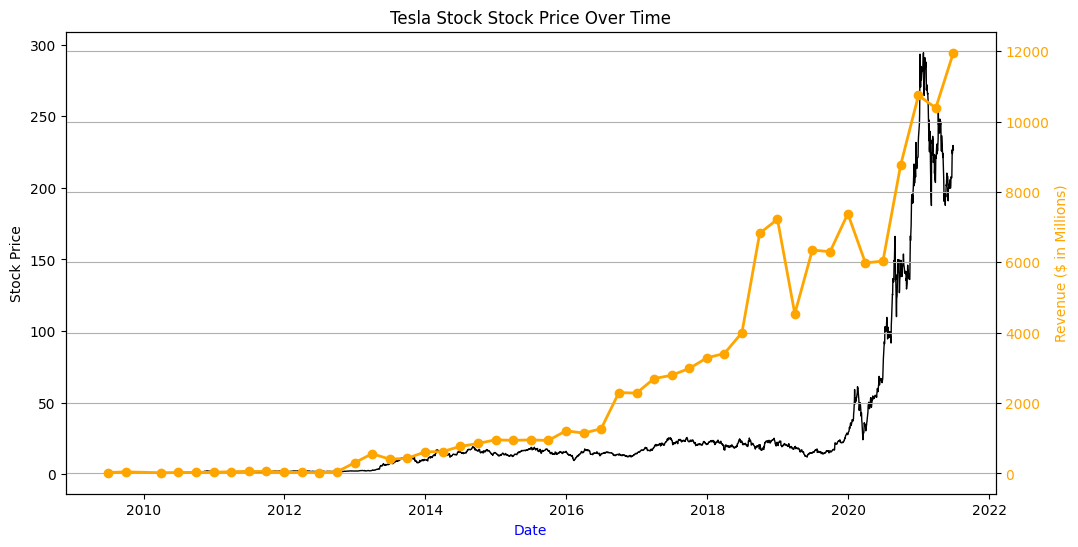

In [60]:
make_graph(tesla_stock, tesla_df_filtered, 'Tesla Stock')